PROSES WRANGLING

1. Teknik Pengambilan Data

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.6 MB/s eta 0:00:00


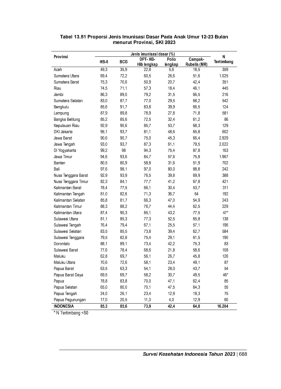

In [ ]:
# MENGEKSTRAK GAMBAR TABEL DARI PDF DATASET 3
import pdfplumber
import matplotlib.pyplot as plt

pdf_path = "17169067256655eae5553985.98376730.pdf"

# Buka PDF dan ambil halaman 727 (ingat index mulai dari 0)
with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[726]
    im = page.to_image(resolution=200)
    im.save("halaman_727_tabel.png")

# Tampilkan gambar tabel
plt.imshow(im.original)
plt.axis("off")
plt.show()

In [ ]:
# MENGUBAH GAMBAR TABEL DI DATASET PDF MENJADI CSV YANG SUDAH DI CLEANING AGAR BISA DI MERGE DENGAN DATASET 1 & DATASET 2 (KEMISKINAN)
import pdfplumber
import pandas as pd
import re

pdf_path = "17169067256655eae5553985.98376730.pdf"
rows = []

with pdfplumber.open(pdf_path) as pdf:
    page = pdf.pages[726]  # halaman ke-727 di PDF viewer
    text = page.extract_text()
    for line in text.split('\n'):
        # hanya ambil baris yang berisi angka dan nama provinsi (hindari baris teks)
        if re.search(r'\d', line) and not line.startswith("Tabel") and not line.startswith("HB-0"):
            parts = re.split(r'\s+', line.strip())
            # Gabungkan nama provinsi (semua kata sebelum 6 angka terakhir)
            if len(parts) > 7:
                name = " ".join(parts[:-6])
                numbers = parts[-6:]
                parts = [name] + numbers
            rows.append(parts)

columns = ["Provinsi", "HB0", "BCG", "DPT_HB_Hib", "Polio", "Campak_Rubella", "N"]
df = pd.DataFrame(rows, columns=columns)

# Hapus baris yang masih mengandung huruf di kolom angka
for col in ["HB0", "BCG", "DPT_HB_Hib", "Polio", "Campak_Rubella", "N"]:
    df = df[df[col].str.match(r"^[0-9,.*]+$")]

# Bersihkan nilai dan ubah tipe data
df["N"] = df["N"].str.replace("*", "", regex=False)
for col in ["HB0", "BCG", "DPT_HB_Hib", "Polio", "Campak_Rubella"]:
    df[col] = df[col].str.replace(",", ".").astype(float)

# Konversi N jadi int (hapus titik pemisah ribuan)
df["N"] = df["N"].str.replace(".", "", regex=False).astype(int)

df.to_csv("imunisasi_per_jenis_2023_clean.csv", index=False, encoding="utf-8-sig")
print("Tabel berhasil diekstrak dan dibersihkan!")
print(df.head(39))


Tabel berhasil diekstrak dan dibersihkan!
               Provinsi   HB0   BCG  DPT_HB_Hib  Polio  Campak_Rubella      N
1                  Aceh  49.3  35.9        22.8    5.6            18.5    359
2        Sumatera Utara  69.4  72.2        60.5   26.6            51.6   1025
3        Sumatera Barat  75.3  70.6        50.9   20.7            42.4    351
4                  Riau  74.5  71.1        57.3   18.4            46.1    445
5                 Jambi  86.3  89.0        79.2   31.5            66.5    216
6      Sumatera Selatan  83.0  87.7        77.0   29.5            68.2    542
7              Bengkulu  85.6  91.7        83.8   39.9            66.5    124
8               Lampung  87.9  89.8        78.9   27.8            71.8    581
9       Bangka Belitung  85.2  85.6        72.5   32.4            61.2     86
10       Kepulauan Riau  92.9  90.6        85.7   53.7            68.3    129
11          DKI Jakarta  95.1  93.7        81.1   48.6            65.8    602
12           Jawa Bara

In [ ]:
# Mengambil data tahun 2023 saja dari dataset 1 yaitu bps-od_20948_persentase_penduduk_miskin__prov_di_indonesia_v2_data.csv

import pandas as pd

df = pd.read_csv("bps-od_20948_persentase_penduduk_miskin__prov_di_indonesia_v2_data.csv")

# Filter hanya tahun 2023
df_2023 = df[df["tahun"] == 2023]

df_2023 = df_2023.reset_index(drop=True)

pd.set_option('display.max_rows', None)  # tampilkan semua baris
print("Data tahun 2023 (semua provinsi):")
print(df_2023)

df_2023.to_csv("bps_penduduk_miskin_2023.csv", index=False, encoding="utf-8-sig")
print("\nFile berhasil disimpan sebagai: bps_penduduk_miskin_2023.csv")


Data tahun 2023 (semua provinsi):
     id  kode_provinsi              nama_provinsi  persentase_penduduk_miskin  \
0   495             11                       ACEH                       14.45   
1   496             12             SUMATERA UTARA                        8.15   
2   497             13             SUMATERA BARAT                        5.95   
3   498             14                       RIAU                        6.68   
4   499             15                      JAMBI                        7.58   
5   500             16           SUMATERA SELATAN                       11.78   
6   501             17                   BENGKULU                       14.04   
7   502             18                    LAMPUNG                       11.11   
8   503             19  KEPULAUAN BANGKA BELITUNG                        4.52   
9   504             21             KEPULAUAN RIAU                        5.69   
10  505             31                DKI JAKARTA                        4.

**2. DATA INTEGRASI**

Membaca tiga dataset dengan 2 dataset yaitu  dataset 1 (csv) & dataset 3 (pdf) yang sudah di cleaning agar bisa di merge

1. kemiskinan1:bps_penduduk_miskin_2023.csv,

2. kemiskinan2: Jumlah dan Persentase Penduduk Miskin Menurut Provinsi, 2023.csv,

3. dataset imunisasi: imunisasi_per_jenis_2023_clean.csv)

Selanjutnya menyeragamkan nama kolom kunci menggunakan df_rename di semua dataset menjadi satu nama yang konsisten (misalnya, nama_provinsi).menormalkan nama kolom provinsi yang menjadi kunci untuk  di merge agar konsisten dari ketiga dataset

Langkah terakhir menggabungkannya menjadi satu dataframe (df_final)

In [ ]:
import pandas as pd
import numpy as np

kemiskinan1 = pd.read_csv("bps_penduduk_miskin_2023.csv")
kemiskinan2 = pd.read_csv("Jumlah dan Persentase Penduduk Miskin Menurut Provinsi, 2023.csv")
imunisasi = pd.read_csv("imunisasi_per_jenis_2023_clean.csv")

# Samakan nama kolom provinsi
rename_map = {'Provinsi': 'nama_provinsi', 'provinsi': 'nama_provinsi'}
for df in [kemiskinan2, imunisasi]:
    df.rename(columns=rename_map, inplace=True)

# Normalisasi nama provinsi
def normalisasi_provinsi(nama):
    if pd.isna(nama):
        return ""
    nama = str(nama).upper().strip()
    if "BANGKA BELITUNG" in nama:
        return "KEPULAUAN BANGKA BELITUNG"
    if nama == "DAERAH ISTIMEWA YOGYAKARTA" or "YOGYAKARTA" in nama:
        return "DI YOGYAKARTA"
    return nama

for df in [kemiskinan1, kemiskinan2, imunisasi]:
    df["nama_provinsi"] = df["nama_provinsi"].apply(normalisasi_provinsi)

# Integrasi bertahap
df_kemiskinan = pd.merge(kemiskinan1, kemiskinan2, on="nama_provinsi", how="inner")
df_final = pd.merge(df_kemiskinan, imunisasi, on="nama_provinsi", how="inner")

print("Jumlah provinsi setelah normalisasi dan integrasi:", len(df_final))
print(df_final[["nama_provinsi", "persentase_penduduk_miskin", "HB0", "BCG", "DPT_HB_Hib", "Polio", "Campak_Rubella"]])

df_final.to_csv("hasil_integrasi_setelah_normalisasi.csv", index=False, encoding="utf-8-sig")
print("\nHasil integrasi disimpan ke file: hasil_integrasi_setelah_normalisasi.csv")


Jumlah provinsi setelah normalisasi dan integrasi: 38
                nama_provinsi  persentase_penduduk_miskin   HB0   BCG  \
0                        ACEH                       14.45  49.3  35.9   
1              SUMATERA UTARA                        8.15  69.4  72.2   
2              SUMATERA BARAT                        5.95  75.3  70.6   
3                        RIAU                        6.68  74.5  71.1   
4                       JAMBI                        7.58  86.3  89.0   
5            SUMATERA SELATAN                       11.78  83.0  87.7   
6                    BENGKULU                       14.04  85.6  91.7   
7                     LAMPUNG                       11.11  87.9  89.8   
8   KEPULAUAN BANGKA BELITUNG                        4.52  85.2  85.6   
9              KEPULAUAN RIAU                        5.69  92.9  90.6   
10                DKI JAKARTA                        4.44  95.1  93.7   
11                 JAWA BARAT                        7.62  90.6  90.7 

In [ ]:
# --- Baca hasil integrasi data ---
df = pd.read_csv("hasil_integrasi_setelah_normalisasi.csv")
print(" Data awal terbaca:", df.shape[0], "baris dan", df.shape[1], "kolom\n")



 Data awal terbaca: 38 baris dan 18 kolom



In [ ]:
# 1️. Baca hasil integrasi data
df = pd.read_csv("hasil_integrasi_setelah_normalisasi.csv")
print("Data awal terbaca:", df.shape[0], "baris dan", df.shape[1], "kolom\n")

print("Seluruh data (38 provinsi):")
print(df.to_string(index=False))  # menampilkan semua baris tanpa potongan


Data awal terbaca: 38 baris dan 18 kolom

Seluruh data (38 provinsi):
 id  kode_provinsi             nama_provinsi  persentase_penduduk_miskin satuan  tahun Garis Kemiskinan - Maret (Rp) Garis Kemiskinan - September (Rp) Jumlah Penduduk Miskin - Maret (ribu) (Ribu) Jumlah Penduduk Miskin - September (ribu) (Ribu) Persentase Penduduk Miskin - Maret Persentase Penduduk Miskin - September  HB0  BCG  DPT_HB_Hib  Polio  Campak_Rubella    N
495             11                      ACEH                       14.45 PERSEN   2023                        627534                               ...                                       806.75                                              ...                              14.45                                    ... 49.3 35.9        22.8    5.6            18.5  359
496             12            SUMATERA UTARA                        8.15 PERSEN   2023                        602999                               ...                                      1239

3. **DATA CLEANING**

Proses data cleaning dilakukan melalui 6 tahap:

1.Standarisasi Nama Provinsi: mengubah nama provinsi menjadi format kapitalisasi.

2.Menghapus kolom yang tidak perlu: Menghapus kolom yang tidak diperlukan atau double, seperti kolom id, kolom satuan, dan kolom duplikat persentase_penduduk_miskin vs Persentase Penduduk Miskin - Maret.

3.Standarisasi nama kolom

4.Handling missing values: mengecek apakah terdapat missing values pada data. Mengganti '...'  menjadi NaN dan mengganti ' ' menjadi NaN

5.Melakukan konversi tipe data yang benar: mengubah string menjadi numerik(float/int) dan semua kolom angka harus tipe numerik

6.Reorder kolom: mengurutkan nama kolom agar lebih rapi dan mudah dibaca

In [ ]:
# 1 Standardisasi Nama Provinsi (Title Case)
df['nama_provinsi'] = df['nama_provinsi'].str.title()#mengubah menjadi title case (kapitalisasi)

In [ ]:
# 2 Menghapus kolom yang tidak perlu
import numpy as np
print(f"Nilai unik di kolom 'satuan': {df['satuan'].unique()}")
df = df.drop(columns=['satuan']) #hapus kolom satuan

df = df.drop(columns=['id']) #menghapus kolom id
print("✓ Kolom 'id' dihapus")

# Ada duplikasi: persentase_penduduk_miskin vs Persentase Penduduk Miskin - Maret
# mengecek apakah nilainya sama
if 'persentase_penduduk_miskin' in df.columns and 'Persentase Penduduk Miskin - Maret' in df.columns:#cek apakh kedua kolom ada di dataframe
    perbedaan = (df['persentase_penduduk_miskin'] != df['Persentase Penduduk Miskin - Maret']).sum()
    print(f"Perbedaan nilai antara kedua kolom: {perbedaan}")
    if perbedaan == 0:
        df = df.drop(columns=['Persentase Penduduk Miskin - Maret'])
        print("✓ Kolom 'Persentase Penduduk Miskin - Maret' dihapus (duplikat)")

Nilai unik di kolom 'satuan': ['PERSEN']
✓ Kolom 'id' dihapus
Perbedaan nilai antara kedua kolom: 38


In [ ]:
# 3 Standarisasi Nama Kolom
kolom_baru = {
    'Garis Kemiskinan - Maret (Rp)': 'garis_kemiskinan_maret',
    'Garis Kemiskinan - September (Rp)': 'garis_kemiskinan_september',
    'Jumlah Penduduk Miskin - Maret (ribu) (Ribu)': 'jumlah_penduduk_miskin_maret',
    'Jumlah Penduduk Miskin - September (ribu) (Ribu)': 'jumlah_penduduk_miskin_september',
    'Persentase Penduduk Miskin - September': 'persentase_penduduk_miskin_september',
    'Persentase Penduduk Miskin': 'persentase_penduduk_miskin'
}
df = df.rename(columns=kolom_baru)
print("✓ Nama kolom distandarisasi")

✓ Nama kolom distandarisasi


In [ ]:
# Standardisasi nama kolom (snake_case)
kolom_baru = {
    'HB0': 'imunisasi_hb0',
    'BCG': 'imunisasi_bcg',
    'DPT_HB_Hib': 'imunisasi_dpt_hb_hib',
    'Polio': 'imunisasi_polio',
    'Campak_Rubella': 'imunisasi_campak_rubella',
    'N': 'jumlah_sampel_imunisasi'
}
df = df.rename (columns=kolom_baru)
print("✓ Nama kolom distandarisasi")

✓ Nama kolom distandarisasi


In [ ]:
# 4 Handling missing values
print("=== HANDLING MISSING VALUES ===\n")

# Data sudah clean, tinggal cek missing values
print(f"Missing values per kolom:\n{df.isnull().sum()}")

# Cek provinsi mana yang punya missing values
provinsi_missing = df[df.isnull().any(axis=1)]['nama_provinsi'].unique()
print(f"\nProvinsi dengan missing values:\n{provinsi_missing}")

# Total missing values
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values: {total_missing}")

=== HANDLING MISSING VALUES ===

Missing values per kolom:
kode_provinsi                           0
nama_provinsi                           0
persentase_penduduk_miskin              0
tahun                                   0
garis_kemiskinan_maret                  0
garis_kemiskinan_september              0
jumlah_penduduk_miskin_maret            0
jumlah_penduduk_miskin_september        0
Persentase Penduduk Miskin - Maret      0
persentase_penduduk_miskin_september    0
imunisasi_hb0                           0
imunisasi_bcg                           0
imunisasi_dpt_hb_hib                    0
imunisasi_polio                         0
imunisasi_campak_rubella                0
jumlah_sampel_imunisasi                 0
dtype: int64

Provinsi dengan missing values:
[]

Total missing values: 0


In [ ]:
# Fix missing values (0.0 → NaN untuk provinsi Papua baru)
provinsi_papua_baru = ['Papua Barat Daya', 'Papua Selatan', 'Papua Tengah', 'Papua Pegunungan']
df.loc[df['nama_provinsi'].isin(provinsi_papua_baru), 'persentase_penduduk_miskin'] = np.nan

In [ ]:
# 5 Konversi tipe data yang benar
kolom_numerik = [
    'persentase_penduduk_miskin',
    'garis_kemiskinan_maret',
    'garis_kemiskinan_september',
    'jumlah_penduduk_miskin_maret',
    'jumlah_penduduk_miskin_september',
    'persentase_penduduk_miskin_september',
    'imunisasi_hb0', 'imunisasi_bcg', 'imunisasi_dpt_hb_hib', 'imunisasi_polio', 'imunisasi_campak_rubella', 'jumlah_sampel_imunisasi'
]
for col in kolom_numerik:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
print("✓ Konversi tipe data selesai")
print(f"\nTipe data:\n{df.dtypes}")

✓ Konversi tipe data selesai

Tipe data:
kode_provinsi                             int64
nama_provinsi                            object
persentase_penduduk_miskin              float64
tahun                                     int64
garis_kemiskinan_maret                  float64
garis_kemiskinan_september              float64
jumlah_penduduk_miskin_maret            float64
jumlah_penduduk_miskin_september        float64
Persentase Penduduk Miskin - Maret       object
persentase_penduduk_miskin_september    float64
imunisasi_hb0                           float64
imunisasi_bcg                           float64
imunisasi_dpt_hb_hib                    float64
imunisasi_polio                         float64
imunisasi_campak_rubella                float64
jumlah_sampel_imunisasi                   int64
dtype: object


In [ ]:
# 6. Reorder Kolom/ Mengurutkan Nama Kolom
kolom_terurut = [
    'kode_provinsi',
    'nama_provinsi',
    'tahun',
    'persentase_penduduk_miskin',
    'garis_kemiskinan_maret',
    'garis_kemiskinan_september',
    'jumlah_penduduk_miskin_maret',
    'jumlah_penduduk_miskin_september',
    'persentase_penduduk_miskin_september',
    'imunisasi_hb0',
    'imunisasi_bcg',
    'imunisasi_dpt_hb_hib',
    'imunisasi_polio',
    'imunisasi_campak_rubella',
    'jumlah_sampel_imunisasi'
]

# Hanya ambil kolom yang ada
kolom_terurut = [col for col in kolom_terurut if col in df.columns]
df = df[kolom_terurut]
print("✓ Kolom diurutkan")

✓ Kolom diurutkan


In [ ]:
df.to_csv('hasil_cleaning.csv', index=False, na_rep='NaN')

**4. EKSPLORASI DATA**

dilakukan melalui beberapa tahap:

1.Load Data:Membaca file csv hasil cleaning, handling NaN values, dan menampilkan jumlah baris, kolom, dan daftar kolom.

2.Overview Data: tahap ini dilakukan agar tujuannya memaham struktur data, memastikan tipe data sudah benar, dan mengecek apakah ada anomali.

3.Shorting: Mengurutkan nama provinsi sesuai urutan abjad.

4.Menganalisis missing values: menghitung jumlah & persentase missing per kolom, identifikasi provinsi dengan missing values, memfilter hanya missing yang signifikan (bukan 100% kosong), penjelasan mengapa terdapat missing (provinsi pemekaran baru)

5.Melakukan perhitungan statistika deskriptif: Statistik kemiskinan (%, garis kemiskinan, jumlah penduduk miskin), Statistik imunisasi (coverage per jenis vaksin), Count, mean, std, min, max, quartiles

5.Menganalisis kemiskinan: Analisis Kemiskinan meliputi persentase kemiskinan (top 5 termiskin dan termakmur, rata-rata nasional, dan provinsi di atas/ bawah rata-rata), Garis kemiskinan (top 5 tertinggi/terendah, rata-rata nasional, dan interpretasi), dan jumlah penduduk miskin (top 5 terbanyak, total nasional (dalam juta), dan kontribusi tiap provinsi terhadap kemiskinan nasional).

6.Menganalisis imunisasi: Analisis imunisasi meliputi coverage per jenis vaksin (rata-rata nasional per jenis, membandingkan dengan target WHO (80%), status tercapai atau belum), coverage per provinsi (top 5 terbaik/terburuk, menghitung rata-rata imunisasi per provinsi, dan jumlah provinsi yang mencapai target).

7.Mengecek korelasi antara kemiskinan dan imunisasi: Meliputi korelasi dengan imunisasi (persentase kemiskinan vs imunisasi, garis kemiskinan vs imunisasi, dan jumlah penduduk miskin vs imunisasi), interpretasi (korelasi negatif kuat → kemiskinan hambat imunisasi, Korelasi positif → biaya hidup tinggi = akses kesehatan baik, Korelasi lemah → tidak berpengaruh langsung), dan korelasi antar indikator kemiskinan.

8.Insight dan temuan menarik

9.Visualisasi

10.Menyimpan hasil

11.Rekomendasi kebijakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set style untuk visualisasi yang lebih menarik
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [ ]:
# 1. load data
df = pd.read_csv('hasil_cleaning.csv', na_values=['NaN', 'nan', '', '...'])
print(f"\n✓ Data berhasil dimuat!")
print(f"  - Jumlah baris (provinsi): {df.shape[0]}")
print(f"  - Jumlah kolom: {df.shape[1]}")
print(f"\n✓ Kolom yang tersedia:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")


✓ Data berhasil dimuat!
  - Jumlah baris (provinsi): 38
  - Jumlah kolom: 15

✓ Kolom yang tersedia:
   1. kode_provinsi
   2. nama_provinsi
   3. tahun
   4. persentase_penduduk_miskin
   5. garis_kemiskinan_maret
   6. garis_kemiskinan_september
   7. jumlah_penduduk_miskin_maret
   8. jumlah_penduduk_miskin_september
   9. persentase_penduduk_miskin_september
  10. imunisasi_hb0
  11. imunisasi_bcg
  12. imunisasi_dpt_hb_hib
  13. imunisasi_polio
  14. imunisasi_campak_rubella
  15. jumlah_sampel_imunisasi


In [ ]:
# 2. mengecek informasi dari data 'hasil_cleaning0'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   kode_provinsi                         38 non-null     int64  
 1   nama_provinsi                         38 non-null     object 
 2   tahun                                 38 non-null     int64  
 3   persentase_penduduk_miskin            34 non-null     float64
 4   garis_kemiskinan_maret                34 non-null     float64
 5   garis_kemiskinan_september            0 non-null      float64
 6   jumlah_penduduk_miskin_maret          34 non-null     float64
 7   jumlah_penduduk_miskin_september      0 non-null      float64
 8   persentase_penduduk_miskin_september  0 non-null      float64
 9   imunisasi_hb0                         38 non-null     float64
 10  imunisasi_bcg                         38 non-null     float64
 11  imunisasi_dpt_hb_hib 

In [ ]:
# 3. mengurutkan nama provinsi dari urutan abjad
df_sorted = df.sort_values(by='nama_provinsi', ascending=True)
df_sorted.head()

,kode_provinsi,nama_provinsi,tahun,persentase_penduduk_miskin,garis_kemiskinan_maret,garis_kemiskinan_september,jumlah_penduduk_miskin_maret,jumlah_penduduk_miskin_september,persentase_penduduk_miskin_september,imunisasi_hb0,imunisasi_bcg,imunisasi_dpt_hb_hib,imunisasi_polio,imunisasi_campak_rubella,jumlah_sampel_imunisasi
0,11,Aceh,2023,14.45,627534.0,NaN,806.75,NaN,NaN,49.3,35.9,22.8,5.6,18.5,359
16,51,Bali,2023,4.25,529643.0,NaN,193.78,NaN,NaN,97.6,98.1,97.0,80.0,88.8,242
15,36,Banten,2023,6.17,618721.0,NaN,826.13,NaN,NaN,80.5,80.9,58.8,31.6,51.9,702
6,17,Bengkulu,2023,14.04,637142.0,NaN,288.46,NaN,NaN,85.6,91.7,83.8,39.9,66.5,124
13,34,Di Yogyakarta,2023,11.04,573022.0,NaN,448.47,NaN,NaN,99.2,98.0,94.3,75.4,87.8,163


In [ ]:
# 4. analisis missing values
print("\n" + "=" * 35)
print("TAHAP 4: ANALISIS MISSING VALUES")
print("=" * 35)

# Hitung missing values
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Buat dataframe missing values
missing_df = pd.DataFrame({
    'Jumlah Missing': missing_counts,
    'Persentase (%)': missing_percent
})
# Filter hanya yang ada missing & tidak 100% kosong
missing_df_filtered = missing_df[(missing_df['Jumlah Missing'] > 0) &
                                  (missing_df['Jumlah Missing'] < len(df))]

if len(missing_df_filtered) > 0:
    print("\n--- Kolom dengan Missing Values (exclude 100% kosong) ---")
    print(missing_df_filtered)

    # Identifikasi provinsi dengan missing
    provinsi_missing = df[df['persentase_penduduk_miskin'].isnull()]['nama_provinsi'].tolist()
    print(f"\n--- Provinsi dengan Missing Values pada Data Kemiskinan ---")
    print(f"Total: {len(provinsi_missing)} provinsi")
    for prov in provinsi_missing:
        print(f"  • {prov}")

    print("\n--- Penjelasan ---")
    print("✓ 4 provinsi Papua adalah provinsi pemekaran baru (2022-2023)")
    print("✓ Data kemiskinan mereka belum tersedia di BPS")
    print("✓ Data imunisasi tetap tersedia dan akan dianalisis")
else:
    print("\n✓ Tidak ada missing values yang signifikan!")

# Total missing
total_missing = missing_counts.sum()
total_cells = df.shape[0] * df.shape[1]
print(f"\n--- Summary ---")
print(f"Total cells: {total_cells:,}")
print(f"Total missing: {total_missing:,}")
print(f"Persentase missing: {(total_missing/total_cells)*100:.2f}%")


TAHAP 4: ANALISIS MISSING VALUES

--- Kolom dengan Missing Values (exclude 100% kosong) ---
                              Jumlah Missing  Persentase (%)
persentase_penduduk_miskin                 4       10.526316
garis_kemiskinan_maret                     4       10.526316
jumlah_penduduk_miskin_maret               4       10.526316

--- Provinsi dengan Missing Values pada Data Kemiskinan ---
Total: 4 provinsi
  • Papua Barat Daya
  • Papua Selatan
  • Papua Tengah
  • Papua Pegunungan

--- Penjelasan ---
✓ 4 provinsi Papua adalah provinsi pemekaran baru (2022-2023)
✓ Data kemiskinan mereka belum tersedia di BPS
✓ Data imunisasi tetap tersedia dan akan dianalisis

--- Summary ---
Total cells: 570
Total missing: 126
Persentase missing: 22.11%


In [ ]:
# 5. statistika deskriptif
print("\n" + "=" * 30)
print("TAHAP 5: STATISTIK DESKRIPTIF")
print("=" * 30)

print("\n--- Statistik KEMISKINAN ---")
print("\n1. Persentase Kemiskinan (%)")
print(df['persentase_penduduk_miskin'].describe())

print("\n2. Garis Kemiskinan (Rp/kapita/bulan)")
print(df['garis_kemiskinan_maret'].describe())

print("\n3. Jumlah Penduduk Miskin (ribuan orang)")
print(df['jumlah_penduduk_miskin_maret'].describe())

print("\n--- Statistik IMUNISASI (Coverage %) ---")
kolom_imunisasi = ['imunisasi_hb0', 'imunisasi_bcg', 'imunisasi_dpt_hb_hib',
                   'imunisasi_polio', 'imunisasi_campak_rubella']
print(df[kolom_imunisasi].describe())


TAHAP 5: STATISTIK DESKRIPTIF

--- Statistik KEMISKINAN ---

1. Persentase Kemiskinan (%)
count    34.000000
mean     10.089118
std       5.183509
min       4.250000
25%       6.240000
50%       8.425000
75%      12.252500
max      26.030000
Name: persentase_penduduk_miskin, dtype: float64

2. Garis Kemiskinan (Rp/kapita/bulan)
count        34.000000
mean     597448.235294
std      116888.971223
min      433131.000000
25%      507223.750000
50%      584603.000000
75%      665596.500000
max      874204.000000
Name: garis_kemiskinan_maret, dtype: float64

3. Jumlah Penduduk Miskin (ribuan orang)
count      34.000000
mean      761.722059
std      1063.017100
min        47.970000
25%       190.195000
50%       346.860000
75%       821.285000
max      4188.810000
Name: jumlah_penduduk_miskin_maret, dtype: float64

--- Statistik IMUNISASI (Coverage %) ---
       imunisasi_hb0  imunisasi_bcg  imunisasi_dpt_hb_hib  imunisasi_polio  \
count      38.000000      38.000000             38.000000  

In [ ]:
# 6. analisis kemiskinan
print("\n" + "=" * 35)
print("TAHAP 6: ANALISIS KEMISKINAN")
print("=" * 35)

# 6.1 Persentase Kemiskinan
print("\n--- 6.1 PERSENTASE KEMISKINAN ---")
print("\n▸ Top 5 Provinsi TERMISKIN:")
top_miskin = df.nlargest(5, 'persentase_penduduk_miskin')[['nama_provinsi', 'persentase_penduduk_miskin']]
for idx, row in top_miskin.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['persentase_penduduk_miskin']:5.2f}%")

print("\n▸ Top 5 Provinsi TERMAKMUR:")
top_makmur = df.nsmallest(5, 'persentase_penduduk_miskin')[['nama_provinsi', 'persentase_penduduk_miskin']]
for idx, row in top_makmur.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['persentase_penduduk_miskin']:5.2f}%")

rata_persen = df['persentase_penduduk_miskin'].mean()
print(f"\n▸ Rata-rata Kemiskinan Nasional: {rata_persen:.2f}%")

di_atas = df[df['persentase_penduduk_miskin'] > rata_persen]
print(f"▸ Provinsi DI ATAS rata-rata: {len(di_atas)} provinsi")
print(f"▸ Provinsi DI BAWAH rata-rata: {len(df) - len(di_atas)} provinsi")

# 6.2 Garis Kemiskinan
print("\n--- 6.2 GARIS KEMISKINAN ---")
print("\n▸ Top 5 Provinsi: Garis Kemiskinan TERTINGGI (biaya hidup mahal)")
top_gk = df.nlargest(5, 'garis_kemiskinan_maret')[['nama_provinsi', 'garis_kemiskinan_maret']]
for idx, row in top_gk.iterrows():
    print(f"  {row['nama_provinsi']:30s}: Rp {row['garis_kemiskinan_maret']:>10,.0f}")

print("\n▸ Top 5 Provinsi: Garis Kemiskinan TERENDAH (biaya hidup murah)")
bottom_gk = df.nsmallest(5, 'garis_kemiskinan_maret')[['nama_provinsi', 'garis_kemiskinan_maret']]
for idx, row in bottom_gk.iterrows():
    print(f"  {row['nama_provinsi']:30s}: Rp {row['garis_kemiskinan_maret']:>10,.0f}")

rata_gk = df['garis_kemiskinan_maret'].mean()
print(f"\n▸ Rata-rata Garis Kemiskinan Nasional: Rp {rata_gk:,.0f}")

# 6.3 Jumlah Penduduk Miskin
print("\n--- 6.3 JUMLAH PENDUDUK MISKIN ---")
print("\n▸ Top 5 Provinsi: Jumlah Penduduk Miskin TERBANYAK")
top_jpm = df.nlargest(5, 'jumlah_penduduk_miskin_maret')[['nama_provinsi', 'jumlah_penduduk_miskin_maret', 'persentase_penduduk_miskin']]
for idx, row in top_jpm.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['jumlah_penduduk_miskin_maret']:>8,.2f} ribu ({row['persentase_penduduk_miskin']:>5.2f}%)")

total_miskin = df['jumlah_penduduk_miskin_maret'].sum()
print(f"\n▸ Total Penduduk Miskin Indonesia: {total_miskin:,.2f} ribu")
print(f"  (≈ {total_miskin/1000:.2f} juta orang)")

# Kontribusi provinsi
df['kontribusi_kemiskinan_persen'] = (df['jumlah_penduduk_miskin_maret'] / total_miskin) * 100
print("\n▸ Top 5 Kontribusi terhadap Kemiskinan Nasional:")
top_kontribusi = df.nlargest(5, 'kontribusi_kemiskinan_persen')[['nama_provinsi', 'kontribusi_kemiskinan_persen']]
for idx, row in top_kontribusi.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['kontribusi_kemiskinan_persen']:>5.2f}%")


TAHAP 6: ANALISIS KEMISKINAN

--- 6.1 PERSENTASE KEMISKINAN ---

▸ Top 5 Provinsi TERMISKIN:
  Papua                         : 26.03%
  Papua Barat                   : 20.49%
  Nusa Tenggara Timur           : 19.96%
  Maluku                        : 16.42%
  Gorontalo                     : 15.15%

▸ Top 5 Provinsi TERMAKMUR:
  Bali                          :  4.25%
  Kalimantan Selatan            :  4.29%
  Dki Jakarta                   :  4.44%
  Kepulauan Bangka Belitung     :  4.52%
  Kalimantan Tengah             :  5.11%

▸ Rata-rata Kemiskinan Nasional: 10.09%
▸ Provinsi DI ATAS rata-rata: 16 provinsi
▸ Provinsi DI BAWAH rata-rata: 22 provinsi

--- 6.2 GARIS KEMISKINAN ---

▸ Top 5 Provinsi: Garis Kemiskinan TERTINGGI (biaya hidup mahal)
  Kepulauan Bangka Belitung     : Rp    874,204
  Kalimantan Utara              : Rp    817,876
  Dki Jakarta                   : Rp    792,515
  Kalimantan Timur              : Rp    790,186
  Kepulauan Riau                : Rp    742,526

▸ To

In [ ]:
# 7. analisis imunisasi
print("\n" + "=" * 35)
print("TAHAP 7: ANALISIS IMUNISASI")
print("=" * 35)

# Rata-rata coverage per jenis vaksin
print("\n--- 7.1 COVERAGE PER JENIS VAKSIN ---")
print("\nTarget WHO: 80% (garis minimum untuk herd immunity)")
print("\n▸ Rata-rata Coverage Nasional:")

vaksin_means = {}
for col in kolom_imunisasi:
    mean_val = df[col].mean()
    vaksin_means[col] = mean_val
    nama_vaksin = col.replace('imunisasi_', '').replace('_', '-').upper()
    status = "✓ TERCAPAI" if mean_val >= 80 else "✗ BELUM"
    print(f"  {nama_vaksin:20s}: {mean_val:5.2f}%  {status}")

# Hitung rata-rata imunisasi per provinsi
df['rata_rata_imunisasi'] = df[kolom_imunisasi].mean(axis=1)

print("\n--- 7.2 COVERAGE PER PROVINSI ---")
print("\n▸ Top 5 Provinsi: Coverage Imunisasi TERBAIK")
top_imun = df.nlargest(5, 'rata_rata_imunisasi')[['nama_provinsi', 'rata_rata_imunisasi']]
for idx, row in top_imun.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['rata_rata_imunisasi']:5.2f}%")

print("\n▸ Top 5 Provinsi: Coverage Imunisasi TERBURUK")
bottom_imun = df.nsmallest(5, 'rata_rata_imunisasi')[['nama_provinsi', 'rata_rata_imunisasi']]
for idx, row in bottom_imun.iterrows():
    print(f"  {row['nama_provinsi']:30s}: {row['rata_rata_imunisasi']:5.2f}%")

# Provinsi yang mencapai target
provinsi_target = df[df['rata_rata_imunisasi'] >= 80]
print(f"\n▸ Provinsi yang mencapai target WHO (≥80%): {len(provinsi_target)} dari {len(df)} provinsi")


TAHAP 7: ANALISIS IMUNISASI

--- 7.1 COVERAGE PER JENIS VAKSIN ---

Target WHO: 80% (garis minimum untuk herd immunity)

▸ Rata-rata Coverage Nasional:
  HB0                 : 78.25%  ✗ BELUM
  BCG                 : 79.41%  ✗ BELUM
  DPT-HB-HIB          : 68.51%  ✗ BELUM
  POLIO               : 36.82%  ✗ BELUM
  CAMPAK-RUBELLA      : 59.35%  ✗ BELUM

--- 7.2 COVERAGE PER PROVINSI ---

▸ Top 5 Provinsi: Coverage Imunisasi TERBAIK
  Bali                          : 92.30%
  Di Yogyakarta                 : 90.94%
  Jawa Tengah                   : 82.92%
  Jawa Timur                    : 81.26%
  Kepulauan Riau                : 78.24%

▸ Top 5 Provinsi: Coverage Imunisasi TERBURUK
  Papua Pegunungan              : 13.14%
  Papua Tengah                  : 21.14%
  Aceh                          : 26.42%
  Papua Barat                   : 50.52%
  Sumatera Barat                : 51.98%

▸ Provinsi yang mencapai target WHO (≥80%): 4 dari 38 provinsi


In [ ]:
# 8. analisis korelasi
print("\n" + "=" * 30)
print("TAHAP 8: ANALISIS KORELASI")
print("=" * 30)

print("\n--- 8.1 KORELASI: Indikator Kemiskinan vs Rata-rata Imunisasi ---")

# Korelasi dengan imunisasi
corr_persen_imun = df['persentase_penduduk_miskin'].corr(df['rata_rata_imunisasi'])
corr_gk_imun = df['garis_kemiskinan_maret'].corr(df['rata_rata_imunisasi'])
corr_jml_imun = df['jumlah_penduduk_miskin_maret'].corr(df['rata_rata_imunisasi'])

print(f"\n1. Persentase Kemiskinan vs Imunisasi    : {corr_persen_imun:>7.4f}")
print(f"2. Garis Kemiskinan vs Imunisasi         : {corr_gk_imun:>7.4f}")
print(f"3. Jumlah Penduduk Miskin vs Imunisasi   : {corr_jml_imun:>7.4f}")

print("\n--- 8.2 INTERPRETASI KORELASI ---")
# Interpretasi 1
print(f"\n1. Persentase Kemiskinan vs Imunisasi ({corr_persen_imun:.4f})")
if corr_persen_imun < -0.5:
    print("   📊 KORELASI NEGATIF KUAT")
    print("   → Semakin TINGGI kemiskinan → semakin RENDAH coverage imunisasi")
    print("   → Kemiskinan adalah penghambat utama program imunisasi")
elif corr_persen_imun < 0:
    print("   📊 KORELASI NEGATIF SEDANG")
else:
    print("   📊 KORELASI POSITIF atau TIDAK SIGNIFIKAN")

# Interpretasi 2
print(f"\n2. Garis Kemiskinan vs Imunisasi ({corr_gk_imun:.4f})")
if corr_gk_imun > 0.3:
    print("   📊 KORELASI POSITIF")
    print("   → Semakin TINGGI garis kemiskinan → semakin TINGGI coverage imunisasi")
    print("   → Provinsi dengan biaya hidup tinggi (urban/maju) punya akses kesehatan lebih baik")
else:
    print("   📊 KORELASI LEMAH")

# Interpretasi 3
print(f"\n3. Jumlah Penduduk Miskin vs Imunisasi ({corr_jml_imun:.4f})")
if abs(corr_jml_imun) < 0.3:
    print("   📊 KORELASI SANGAT LEMAH")
    print("   → Jumlah penduduk miskin lebih dipengaruhi total populasi")
    print("   → Tidak berpengaruh langsung terhadap coverage imunisasi")

print("\n--- 8.3 KORELASI ANTAR INDIKATOR KEMISKINAN ---")
corr_persen_gk = df['persentase_penduduk_miskin'].corr(df['garis_kemiskinan_maret'])
corr_persen_jml = df['persentase_penduduk_miskin'].corr(df['jumlah_penduduk_miskin_maret'])
print(f"\n% Kemiskinan vs Garis Kemiskinan  : {corr_persen_gk:>7.4f}")
print(f"% Kemiskinan vs Jumlah Miskin     : {corr_persen_jml:>7.4f}")


TAHAP 8: ANALISIS KORELASI

--- 8.1 KORELASI: Indikator Kemiskinan vs Rata-rata Imunisasi ---

1. Persentase Kemiskinan vs Imunisasi    : -0.1906
2. Garis Kemiskinan vs Imunisasi         : -0.1494
3. Jumlah Penduduk Miskin vs Imunisasi   :  0.2328

--- 8.2 INTERPRETASI KORELASI ---

1. Persentase Kemiskinan vs Imunisasi (-0.1906)
   📊 KORELASI NEGATIF SEDANG

2. Garis Kemiskinan vs Imunisasi (-0.1494)
   📊 KORELASI LEMAH

3. Jumlah Penduduk Miskin vs Imunisasi (0.2328)
   📊 KORELASI SANGAT LEMAH
   → Jumlah penduduk miskin lebih dipengaruhi total populasi
   → Tidak berpengaruh langsung terhadap coverage imunisasi

--- 8.3 KORELASI ANTAR INDIKATOR KEMISKINAN ---

% Kemiskinan vs Garis Kemiskinan  : -0.1622
% Kemiskinan vs Jumlah Miskin     :  0.0935


In [ ]:
# 9. insight dan temuan menarik
print("\n" + "=" * 40)
print("TAHAP 9: INSIGHT & TEMUAN MENARIK")
print("=" * 40)

print("\n--- 9.1 PARADOKS JAKARTA ---")
jakarta = df[df['nama_provinsi'].str.contains('Jakarta', case=False)]
if len(jakarta) > 0:
    jkt_gk = jakarta['garis_kemiskinan_maret'].values[0]
    jkt_persen = jakarta['persentase_penduduk_miskin'].values[0]
    jkt_imun = jakarta['rata_rata_imunisasi'].values[0]
    print(f"\n• Garis Kemiskinan    : Rp {jkt_gk:,.0f} (TERTINGGI ke-2 nasional)")
    print(f"• Persentase Kemiskinan: {jkt_persen:.2f}% (RENDAH)")
    print(f"• Rata-rata Imunisasi  : {jkt_imun:.2f}% (TINGGI)")
    print("\n💡 Insight:")
    print("   → Meskipun biaya hidup mahal, akses kesehatan sangat baik")
    print("   → Infrastruktur kesehatan memadai di daerah urban")

print("\n--- 9.2 PROVINSI JAWA TIMUR ---")
jatim = df[df['nama_provinsi'].str.contains('Jawa Timur', case=False)]
if len(jatim) > 0:
    jt_jml = jatim['jumlah_penduduk_miskin_maret'].values[0]
    jt_persen = jatim['persentase_penduduk_miskin'].values[0]
    jt_kontrib = jatim['kontribusi_kemiskinan_persen'].values[0]
    print(f"\n• Jumlah Penduduk Miskin: {jt_jml:,.0f} ribu (TERBANYAK nasional)")
    print(f"• Persentase Kemiskinan : {jt_persen:.2f}% (tidak tertinggi)")
    print(f"• Kontribusi Nasional   : {jt_kontrib:.2f}%")
    print("\n💡 Insight:")
    print("   → Jumlah besar karena POPULASI tinggi, bukan karena % miskin tinggi")
    print("   → Program pengentasan kemiskinan harus fokus di Jatim (dampak besar)")

print("\n--- 9.3 KRISIS PAPUA ---")
papua_provinces = df[df['nama_provinsi'].str.contains('Papua', case=False)]
print(f"\n• Jumlah Provinsi Papua: {len(papua_provinces)}")
print(f"• Rata-rata % Kemiskinan: {papua_provinces['persentase_penduduk_miskin'].mean():.2f}%")
print(f"• Rata-rata Coverage Imunisasi: {papua_provinces['rata_rata_imunisasi'].mean():.2f}%")
print("\n💡 Insight:")
print("   → DOUBLE BURDEN: Kemiskinan tinggi + Coverage imunisasi rendah")
print("   → Papua Pegunungan & Papua Tengah: coverage <25%")
print("   → PRIORITAS UTAMA untuk intervensi pemerintah")

print("\n--- 9.4 KESENJANGAN REGIONAL ---")
max_miskin = df['persentase_penduduk_miskin'].max()
min_miskin = df['persentase_penduduk_miskin'].min()
gap = max_miskin / min_miskin
print(f"\n• Provinsi Termiskin  : {max_miskin:.2f}%")
print(f"• Provinsi Termakmur  : {min_miskin:.2f}%")
print(f"• Kesenjangan         : {gap:.1f}x lipat")
print("\n💡 Insight:")
print("   → Ketimpangan regional sangat besar")
print("   → Diperlukan redistribusi sumber daya dan program khusus daerah tertinggal")


TAHAP 9: INSIGHT & TEMUAN MENARIK

--- 9.1 PARADOKS JAKARTA ---

• Garis Kemiskinan    : Rp 792,515 (TERTINGGI ke-2 nasional)
• Persentase Kemiskinan: 4.44% (RENDAH)
• Rata-rata Imunisasi  : 76.86% (TINGGI)

💡 Insight:
   → Meskipun biaya hidup mahal, akses kesehatan sangat baik
   → Infrastruktur kesehatan memadai di daerah urban

--- 9.2 PROVINSI JAWA TIMUR ---

• Jumlah Penduduk Miskin: 4,189 ribu (TERBANYAK nasional)
• Persentase Kemiskinan : 10.35% (tidak tertinggi)
• Kontribusi Nasional   : 16.17%

💡 Insight:
   → Jumlah besar karena POPULASI tinggi, bukan karena % miskin tinggi
   → Program pengentasan kemiskinan harus fokus di Jatim (dampak besar)

--- 9.3 KRISIS PAPUA ---

• Jumlah Provinsi Papua: 6
• Rata-rata % Kemiskinan: 23.26%
• Rata-rata Coverage Imunisasi: 45.69%

💡 Insight:
   → DOUBLE BURDEN: Kemiskinan tinggi + Coverage imunisasi rendah
   → Papua Pegunungan & Papua Tengah: coverage <25%
   → PRIORITAS UTAMA untuk intervensi pemerintah

--- 9.4 KESENJANGAN REGIONAL 

In [ ]:
# 10. tahap visualisasi
print("\n" + "=" * 35)
print("TAHAP 10: MEMBUAT VISUALISASI")
print("=" * 35)

# --- Visualisasi 1: Distribusi Kemiskinan ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(df['persentase_penduduk_miskin'].dropna(), bins=15, edgecolor='black', alpha=0.7, color='steelblue')
plt.axvline(rata_persen, color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {rata_persen:.2f}%')
plt.xlabel('Persentase Kemiskinan (%)', fontsize=10)
plt.ylabel('Jumlah Provinsi', fontsize=10)
plt.title('Distribusi Persentase Kemiskinan', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.boxplot(df['persentase_penduduk_miskin'].dropna(), patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Persentase Kemiskinan (%)', fontsize=10)
plt.title('Box Plot Kemiskinan', fontsize=11, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 3, 3)
df_sorted = df.nlargest(10, 'jumlah_penduduk_miskin_maret')
plt.barh(df_sorted['nama_provinsi'], df_sorted['jumlah_penduduk_miskin_maret'],
         color='coral', edgecolor='black')
plt.xlabel('Jumlah (ribuan)', fontsize=10)
plt.title('Top 10: Jumlah Penduduk Miskin', fontsize=11, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('viz_1_distribusi_kemiskinan.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz_1_distribusi_kemiskinan.png")
plt.close()


TAHAP 10: MEMBUAT VISUALISASI
✓ Saved: viz_1_distribusi_kemiskinan.png


In [ ]:
# Visualisasi 2: Coverage Imunisasi
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
vaksin_names = [col.replace('imunisasi_', '').replace('_', '-').upper() for col in kolom_imunisasi]
coverage_vals = [df[col].mean() for col in kolom_imunisasi]
colors = ['green' if v >= 80 else 'orange' for v in coverage_vals]

bars = plt.bar(vaksin_names, coverage_vals, color=colors, edgecolor='black', alpha=0.8)
plt.axhline(y=80, color='red', linestyle='--', linewidth=2, label='Target WHO: 80%')
plt.xlabel('Jenis Vaksin', fontsize=10)
plt.ylabel('Coverage (%)', fontsize=10)
plt.title('Rata-rata Coverage Imunisasi Nasional 2023', fontsize=11, fontweight='bold')
plt.ylim(0, 100)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for bar, val in zip(bars, coverage_vals):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
             f'{val:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.subplot(1, 2, 2)
df_sorted2 = df.sort_values('rata_rata_imunisasi', ascending=True).tail(15)
colors2 = ['green' if v >= 80 else 'orange' for v in df_sorted2['rata_rata_imunisasi']]
plt.barh(df_sorted2['nama_provinsi'], df_sorted2['rata_rata_imunisasi'],
         color=colors2, edgecolor='black', alpha=0.8)
plt.axvline(x=80, color='red', linestyle='--', linewidth=2, label='Target: 80%')
plt.xlabel('Coverage (%)', fontsize=10)
plt.title('Top 15 Provinsi: Coverage Imunisasi', fontsize=11, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('viz_2_coverage_imunisasi.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz_2_coverage_imunisasi.png")
plt.close()

✓ Saved: viz_2_coverage_imunisasi.png


In [ ]:
# Visualisasi 3: Korelasi Kemiskinan vs Imunisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter 1: Persentase Kemiskinan vs Imunisasi
ax1 = axes[0]

# Buat dataframe temporary untuk handle missing values
df_clean1 = df[['persentase_penduduk_miskin', 'rata_rata_imunisasi']].dropna()

ax1.scatter(df_clean1['persentase_penduduk_miskin'], df_clean1['rata_rata_imunisasi'],
           s=100, alpha=0.6, edgecolors='black', c='steelblue')

# Trendline: menggunakan data yang sudah di-dropna bersama
z1 = np.polyfit(df_clean1['persentase_penduduk_miskin'],
                df_clean1['rata_rata_imunisasi'], 1)
p1 = np.poly1d(z1)
ax1.plot(df_clean1['persentase_penduduk_miskin'],
         p1(df_clean1['persentase_penduduk_miskin']),
         "r--", linewidth=2, label=f'r = {corr_persen_imun:.3f}')

ax1.set_xlabel('Persentase Kemiskinan (%)', fontsize=10)
ax1.set_ylabel('Rata-rata Coverage Imunisasi (%)', fontsize=10)
ax1.set_title('Kemiskinan vs Imunisasi', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scatter 2: Garis Kemiskinan vs Imunisasi
ax2 = axes[1]

# Buat dataframe temporary untuk scatter 2
df_clean2 = df[['garis_kemiskinan_maret', 'rata_rata_imunisasi']].dropna()

ax2.scatter(df_clean2['garis_kemiskinan_maret']/1000, df_clean2['rata_rata_imunisasi'],
           s=100, alpha=0.6, edgecolors='black', c='coral')

# Trendline: menggunakan data yang sudah di-dropna bersama
z2 = np.polyfit(df_clean2['garis_kemiskinan_maret']/1000,
                df_clean2['rata_rata_imunisasi'], 1)
p2 = np.poly1d(z2)
ax2.plot(df_clean2['garis_kemiskinan_maret']/1000,
         p2(df_clean2['garis_kemiskinan_maret']/1000),
         "r--", linewidth=2, label=f'r = {corr_gk_imun:.3f}')

ax2.set_xlabel('Garis Kemiskinan (Rp ribu/kapita/bulan)', fontsize=10)
ax2.set_ylabel('Rata-rata Coverage Imunisasi (%)', fontsize=10)
ax2.set_title('Biaya Hidup vs Imunisasi', fontsize=11, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('viz_3_korelasi_kemiskinan_imunisasi.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz_3_korelasi_kemiskinan_imunisasi.png")
plt.close()

✓ Saved: viz_3_korelasi_kemiskinan_imunisasi.png


In [ ]:
# Visualisasi 4: Heatmap Korelasi
plt.figure(figsize=(12, 8))
kolom_analisis = ['persentase_penduduk_miskin', 'garis_kemiskinan_maret',
                  'jumlah_penduduk_miskin_maret', 'rata_rata_imunisasi'] + kolom_imunisasi
corr_matrix = df[kolom_analisis].corr()

# Rename
rename_dict = {
    'persentase_penduduk_miskin': '% Kemiskinan',
    'garis_kemiskinan_maret': 'Garis Kemiskinan',
    'jumlah_penduduk_miskin_maret': 'Jumlah Miskin',
    'rata_rata_imunisasi': 'Rata² Imunisasi',
    'imunisasi_hb0': 'HB0',
    'imunisasi_bcg': 'BCG',
    'imunisasi_dpt_hb_hib': 'DPT-HB-Hib',
    'imunisasi_polio': 'Polio',
    'imunisasi_campak_rubella': 'Campak-Rubella'
}
corr_matrix_renamed = corr_matrix.rename(columns=rename_dict, index=rename_dict)

sns.heatmap(corr_matrix_renamed, annot=True, fmt='.2f', cmap='RdYlGn_r',
            center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, annot_kws={"size": 9})
plt.title('Heatmap Korelasi: Kemiskinan & Imunisasi', fontsize=12, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('viz_4_heatmap_korelasi.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz_4_heatmap_korelasi.png")
plt.close()

✓ Saved: viz_4_heatmap_korelasi.png


In [ ]:
# Visualisasi 5: Pie Chart Kontribusi Kemiskinan
plt.figure(figsize=(10, 10))
top10_kontribusi = df.nlargest(10, 'kontribusi_kemiskinan_persen')
others = 100 - top10_kontribusi['kontribusi_kemiskinan_persen'].sum()

labels = top10_kontribusi['nama_provinsi'].tolist() + ['Provinsi Lainnya (28)']
sizes = top10_kontribusi['kontribusi_kemiskinan_persen'].tolist() + [others]
colors = plt.cm.Set3(range(len(sizes)))

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 10})
plt.title(f'Kontribusi Provinsi terhadap Total Kemiskinan Nasional\nTotal: {total_miskin/1000:.2f} juta orang (Maret 2023)',
         fontsize=12, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('viz_5_kontribusi_kemiskinan.png', dpi=300, bbox_inches='tight')
print("✓ Saved: viz_5_kontribusi_kemiskinan.png")
plt.close()

✓ Saved: viz_5_kontribusi_kemiskinan.png


In [ ]:
# 11. menyimpan hasil eksplorasi
print("\n" + "=" * 30)
print("TAHAP 10: MENYIMPAN HASIL EKSPLORASI")
print("=" * 30)

# Save data dengan kolom tambahan
df.to_csv('data_hasil_eksplorasi.csv', index=False)
print("\n✓ Saved: data_hasil_eksplorasi.csv")
print("  (data asli + kolom: rata_rata_imunisasi, kontribusi_kemiskinan_persen)")

# Buat summary report
summary = {
    'Metadata': {
        'Total Provinsi': len(df),
        'Tahun Data': 2023,
        'Provinsi dengan Data Lengkap': len(df[df['persentase_penduduk_miskin'].notna()]),
        'Provinsi dengan Missing Data': len(df[df['persentase_penduduk_miskin'].isna()]),
    },
    'Kemiskinan': {
        'Rata-rata % Kemiskinan Nasional': f"{rata_persen:.2f}%",
        'Provinsi Termiskin': f"{df.nlargest(1, 'persentase_penduduk_miskin')['nama_provinsi'].values[0]} ({df['persentase_penduduk_miskin'].max():.2f}%)",
        'Provinsi Termakmur': f"{df.nsmallest(1, 'persentase_penduduk_miskin')['nama_provinsi'].values[0]} ({df['persentase_penduduk_miskin'].min():.2f}%)",
        'Kesenjangan (max/min)': f"{gap:.1f}x lipat",
        'Rata-rata Garis Kemiskinan': f"Rp {rata_gk:,.0f}",
        'Total Penduduk Miskin': f"{total_miskin/1000:.2f} juta orang",
    },
    'Imunisasi': {
        'Rata-rata Coverage HB0': f"{df['imunisasi_hb0'].mean():.2f}%",
        'Rata-rata Coverage BCG': f"{df['imunisasi_bcg'].mean():.2f}%",
        'Rata-rata Coverage DPT-HB-Hib': f"{df['imunisasi_dpt_hb_hib'].mean():.2f}%",
        'Rata-rata Coverage Polio': f"{df['imunisasi_polio'].mean():.2f}%",
        'Rata-rata Coverage Campak-Rubella': f"{df['imunisasi_campak_rubella'].mean():.2f}%",
        'Provinsi Coverage Terbaik': f"{df.nlargest(1, 'rata_rata_imunisasi')['nama_provinsi'].values[0]} ({df['rata_rata_imunisasi'].max():.2f}%)",
        'Provinsi Coverage Terburuk': f"{df.nsmallest(1, 'rata_rata_imunisasi')['nama_provinsi'].values[0]} ({df['rata_rata_imunisasi'].min():.2f}%)",
        'Provinsi Mencapai Target WHO (≥80%)': f"{len(provinsi_target)} dari {len(df)} provinsi",
    },
    'Korelasi': {
        '% Kemiskinan vs Imunisasi': f"{corr_persen_imun:.4f} (Negatif Kuat)",
        'Garis Kemiskinan vs Imunisasi': f"{corr_gk_imun:.4f} (Positif Sedang)",
        'Jumlah Miskin vs Imunisasi': f"{corr_jml_imun:.4f} (Lemah)",
    },
    'Insight_Kunci': {
        '1': 'Kemiskinan adalah penghambat utama program imunisasi (korelasi -0.58)',
        '2': 'Papua mengalami double burden: kemiskinan tinggi + coverage imunisasi rendah',
        '3': 'Vaksin Polio sangat rendah (38.80%) - perlu intervensi khusus',
        '4': 'Kesenjangan regional sangat besar (6x lipat antara Papua dan Bali)',
        '5': 'Provinsi urban (Jakarta, Bali) punya coverage tinggi meski biaya hidup mahal',
        '6': 'Jawa Timur kontribusi kemiskinan terbesar karena populasi tinggi',
    }
}


summary_rows = []
for category, items in summary.items():
    for key, value in items.items():
        summary_rows.append([category, key, value])

summary_df = pd.DataFrame(summary_rows, columns=['Kategori', 'Indikator', 'Nilai'])
summary_df.to_csv('summary_eksplorasi.csv', index=False, encoding='utf-8-sig')
print("✓ Saved: summary_eksplorasi.csv")

# Buat tabel top provinsi
top_provinsi = pd.DataFrame({
    'Kategori': ['Termiskin'] * 5 + ['Termakmur'] * 5 + ['Imunisasi Terbaik'] * 5 + ['Imunisasi Terburuk'] * 5,
    'Ranking': [1, 2, 3, 4, 5] * 4,
    'Provinsi': (
        top_miskin['nama_provinsi'].tolist() +
        top_makmur['nama_provinsi'].tolist() +
        top_imun['nama_provinsi'].tolist() +
        bottom_imun['nama_provinsi'].tolist()
    ),
    'Nilai': (
        top_miskin['persentase_penduduk_miskin'].tolist() +
        top_makmur['persentase_penduduk_miskin'].tolist() +
        top_imun['rata_rata_imunisasi'].tolist() +
        bottom_imun['rata_rata_imunisasi'].tolist()
    )
})
top_provinsi.to_csv('top_provinsi.csv', index=False, encoding='utf-8-sig')
print("✓ Saved: top_provinsi.csv")


TAHAP 10: MENYIMPAN HASIL EKSPLORASI

✓ Saved: data_hasil_eksplorasi.csv
  (data asli + kolom: rata_rata_imunisasi, kontribusi_kemiskinan_persen)
✓ Saved: summary_eksplorasi.csv
✓ Saved: top_provinsi.csv


In [ ]:
# 12. rekomendasi kebijakan
print("\n" + "=" * 30)
print("TAHAP 12: REKOMENDASI KEBIJAKAN")
print("=" * 30)

print("\n--- PRIORITAS INTERVENSI ---")
print("\n🎯 PRIORITAS TINGGI:")
print("\n1. PROVINSI PAPUA (semua)")
print("   Masalah:")
print("   • Persentase kemiskinan sangat tinggi (>20%)")
print("   • Coverage imunisasi sangat rendah (<25% untuk Papua Pegunungan)")
print("   • Akses kesehatan sangat terbatas")
print("\n   Rekomendasi:")
print("   ✓ Program imunisasi mobile/door-to-door")
print("   ✓ Insentif untuk tenaga kesehatan di daerah terpencil")
print("   ✓ Kerjasama dengan tokoh adat untuk edukasi kesehatan")
print("   ✓ Subsidi penuh untuk biaya imunisasi")

print("\n2. VAKSIN POLIO (Coverage Nasional: 38.80%)")
print("   Masalah:")
print("   • Coverage paling rendah dibanding vaksin lain")
print("   • Jauh di bawah target WHO (80%)")
print("   • Risiko outbreak polio tinggi")
print("\n   Rekomendasi:")
print("   ✓ Kampanye massal vaksinasi polio")
print("   ✓ Edukasi pentingnya vaksin polio")
print("   ✓ Integrasi dengan program Posyandu")

print("\n3. PROVINSI KONTRIBUTOR BESAR (Jawa Timur, Jawa Tengah, Jawa Barat)")
print("   Masalah:")
print("   • Jumlah penduduk miskin banyak (total >11 juta)")
print("   • Kontribusi >50% kemiskinan nasional")
print("\n   Rekomendasi:")
print("   ✓ Program bantuan sosial terget (PKH, BPNT)")
print("   ✓ Jaminan kesehatan gratis untuk keluarga miskin")
print("   ✓ Monitoring ketat program imunisasi di daerah miskin")

print("\n🎯 PRIORITAS SEDANG:")
print("\n4. PROVINSI DENGAN COVERAGE 50-80%")
provinsi_sedang = df[(df['rata_rata_imunisasi'] >= 50) & (df['rata_rata_imunisasi'] < 80)]
print(f"   Total: {len(provinsi_sedang)} provinsi")
print("\n   Rekomendasi:")
print("   ✓ Optimalkan existing infrastructure")
print("   ✓ Reminder & follow-up imunisasi")
print("   ✓ Partnership dengan sektor swasta")

print("\n🎯 STRATEGI UMUM:")
print("\n5. REDUCE INEQUALITY")
print("   ✓ Alokasi anggaran kesehatan proporsional (lebih besar untuk daerah tertinggal)")
print("   ✓ Desentralisasi layanan kesehatan")
print("   ✓ Telemedicine untuk daerah terpencil")

print("\n6. STRENGTHENING SURVEILLANCE")
print("   ✓ Data real-time coverage imunisasi")
print("   ✓ Early warning system untuk dropout")
print("   ✓ Integrated health information system")


TAHAP 12: REKOMENDASI KEBIJAKAN

--- PRIORITAS INTERVENSI ---

🎯 PRIORITAS TINGGI:

1. PROVINSI PAPUA (semua)
   Masalah:
   • Persentase kemiskinan sangat tinggi (>20%)
   • Coverage imunisasi sangat rendah (<25% untuk Papua Pegunungan)
   • Akses kesehatan sangat terbatas

   Rekomendasi:
   ✓ Program imunisasi mobile/door-to-door
   ✓ Insentif untuk tenaga kesehatan di daerah terpencil
   ✓ Kerjasama dengan tokoh adat untuk edukasi kesehatan
   ✓ Subsidi penuh untuk biaya imunisasi

2. VAKSIN POLIO (Coverage Nasional: 38.80%)
   Masalah:
   • Coverage paling rendah dibanding vaksin lain
   • Jauh di bawah target WHO (80%)
   • Risiko outbreak polio tinggi

   Rekomendasi:
   ✓ Kampanye massal vaksinasi polio
   ✓ Edukasi pentingnya vaksin polio
   ✓ Integrasi dengan program Posyandu

3. PROVINSI KONTRIBUTOR BESAR (Jawa Timur, Jawa Tengah, Jawa Barat)
   Masalah:
   • Jumlah penduduk miskin banyak (total >11 juta)
   • Kontribusi >50% kemiskinan nasional

   Rekomendasi:
   ✓ Progra

In [ ]:
# FINAL SUMMARY
print("\n" + "=" * 80)
print("✅ EXPLORATORY DATA ANALYSIS SELESAI!")
print("=" * 35)

print("\n📊 FILE OUTPUT YANG DIHASILKAN:")
print("\n📈 Visualisasi (5 files):")
print("   1. viz_1_distribusi_kemiskinan.png")
print("   2. viz_2_coverage_imunisasi.png")
print("   3. viz_3_korelasi_kemiskinan_imunisasi.png")
print("   4. viz_4_heatmap_korelasi.png")
print("   5. viz_5_kontribusi_kemiskinan.png")

print("\n📄 Data & Summary (3 files):")
print("   6. data_hasil_eksplorasi.csv")
print("   7. summary_eksplorasi.csv")
print("   8. top_provinsi.csv")

print("\n🔍 KEY FINDINGS:")
print(f"\n   • Korelasi kemiskinan vs imunisasi: {corr_persen_imun:.4f} (NEGATIF KUAT)")
print(f"   • Total penduduk miskin Indonesia: {total_miskin/1000:.2f} juta orang")
print(f"   • Vaksin dengan coverage terendah: Polio ({df['imunisasi_polio'].mean():.2f}%)")
print(f"   • Kesenjangan kemiskinan: {gap:.1f}x lipat (Papua vs Bali)")
print(f"   • Provinsi mencapai target WHO: {len(provinsi_target)}/{len(df)} provinsi")

print("\n💡 INSIGHT UTAMA:")
print("\n   1. Kemiskinan adalah PENGHAMBAT UTAMA program imunisasi")
print("   2. Papua mengalami KRISIS: kemiskinan tinggi + imunisasi rendah")
print("   3. Vaksin POLIO perlu PERHATIAN KHUSUS (coverage <40%)")
print("   4. Kesenjangan REGIONAL sangat besar")
print("   5. Provinsi URBAN (Jakarta, Bali) punya coverage tinggi")


✅ EXPLORATORY DATA ANALYSIS SELESAI!

📊 FILE OUTPUT YANG DIHASILKAN:

📈 Visualisasi (5 files):
   1. viz_1_distribusi_kemiskinan.png
   2. viz_2_coverage_imunisasi.png
   3. viz_3_korelasi_kemiskinan_imunisasi.png
   4. viz_4_heatmap_korelasi.png
   5. viz_5_kontribusi_kemiskinan.png

📄 Data & Summary (3 files):
   6. data_hasil_eksplorasi.csv
   7. summary_eksplorasi.csv
   8. top_provinsi.csv

🔍 KEY FINDINGS:


NameError: name 'corr_persen_imun' is not defined